In [12]:
#TASK1

import ffmpeg
import json
import os

input_video = r'../sample.mp4'

def extract_frame_info(input_video):
    try:
        probe = ffmpeg.probe(input_video, select_streams='v', show_frames=None, print_format='json')
        for frame in probe['frames']:
            print(f"Frame Number: {frame.get('coded_picture_number', 'N/A')}")
            print(f"Frame Type: {frame.get('pict_type', 'N/A')}")
            # Use .get() with a default value to handle missing 'pts_time'
            print(f"Timestamp: {frame.get('pts_time', 'N/A')}")
            print(f"Size: {frame.get('pkt_size', 'N/A')} bytes")
            print("-" + "-"*50)

    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode('utf8')}")

extract_frame_info(input_video)

Frame Number: 0
Frame Type: I
Timestamp: N/A
Size: 269411 bytes
---------------------------------------------------
Frame Number: 2
Frame Type: B
Timestamp: N/A
Size: 546 bytes
---------------------------------------------------
Frame Number: 3
Frame Type: B
Timestamp: N/A
Size: 8593 bytes
---------------------------------------------------
Frame Number: 4
Frame Type: B
Timestamp: N/A
Size: 5560 bytes
---------------------------------------------------
Frame Number: 1
Frame Type: P
Timestamp: N/A
Size: 67635 bytes
---------------------------------------------------
Frame Number: 6
Frame Type: B
Timestamp: N/A
Size: 333 bytes
---------------------------------------------------
Frame Number: 7
Frame Type: B
Timestamp: N/A
Size: 3252 bytes
---------------------------------------------------
Frame Number: 8
Frame Type: B
Timestamp: N/A
Size: 3324 bytes
---------------------------------------------------
Frame Number: 5
Frame Type: P
Timestamp: N/A
Size: 19200 bytes
------------------------

I-frames: 2 (0.92%)
P-frames: 55 (25.23%)
B-frames: 161 (73.85%)


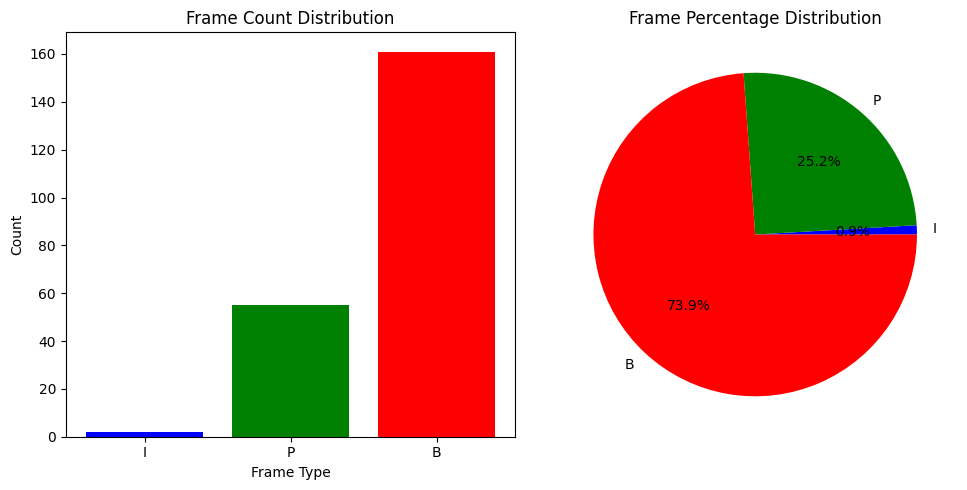

In [11]:
#TASK2

import ffmpeg
import json
import os
import matplotlib.pyplot as plt

input_video = r'/sample.mp4'
def extract_frame_info(input_video):
    try:
        probe = ffmpeg.probe(input_video, select_streams='v', show_frames=None, print_format='json')
        frame_counts = {'I': 0, 'P': 0, 'B': 0}
        total_frames = 0
        for frame in probe['frames']:
            frame_type = frame['pict_type']
            if frame_type in frame_counts:
                frame_counts[frame_type] += 1
                total_frames += 1
        percentages = {key: (value / total_frames) * 100 for key, value in frame_counts.items()}
        print(f"I-frames: {frame_counts['I']} ({percentages['I']:.2f}%)")
        print(f"P-frames: {frame_counts['P']} ({percentages['P']:.2f}%)")
        print(f"B-frames: {frame_counts['B']} ({percentages['B']:.2f}%)")
    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode('utf8')}")
    plot_frame_distribution(frame_counts, percentages)

def plot_frame_distribution(frame_counts, percentages):
    frame_types = list(frame_counts.keys())
    counts = list(frame_counts.values())
    percents = [percentages[key] for key in frame_types]

    # Bar graph
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(frame_types, counts, color=['blue', 'green', 'red'])
    plt.xlabel('Frame Type')
    plt.ylabel('Count')
    plt.title('Frame Count Distribution')

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(percents, labels=frame_types, autopct='%1.1f%%', colors=['blue', 'green', 'red'])
    plt.title('Frame Percentage Distribution')

    # Show plots
    plt.tight_layout()
    plt.show()

extract_frame_info(input_video)

In [12]:
#TASK3

import ffmpeg
import json
from PIL import Image
import os

input_video = r'/sample.mp4'
output_dir = 'extracted_frames'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def extract_frames(input_video, output_dir):
    try:
        ffmpeg.input(input_video).output(os.path.join(output_dir, 'Iframe_%04d.png'), vf='select=eq(pict_type\\,I)', vsync='vfr').run()
        ffmpeg.input(input_video).output(os.path.join(output_dir, 'Pframe_%04d.png'), vf='select=eq(pict_type\\,P)', vsync='vfr').run()
        ffmpeg.input(input_video).output(os.path.join(output_dir, 'Bframe_%04d.png'), vf='select=eq(pict_type\\,B)', vsync='vfr').run()
        print(f"Frames have been successfully extracted and saved in '{output_dir}'.")

    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode('utf8')}")

def display_frames_pillow(output_dir):
    for frame_file in sorted(os.listdir(output_dir)):
        frame_path = os.path.join(output_dir, frame_file)
        img = Image.open(frame_path)
        img.show()

extract_frames(input_video, output_dir)
display_frames_pillow(output_dir)

Frames have been successfully extracted and saved in 'extracted_frames'.


In [13]:
#TASK4

import ffmpeg
import os

input_dir = 'extracted_frames'

def calculate_frame_sizes(input_dir):
    frame_sizes = {'I': [], 'P': [], 'B': []}

    for frame_file in sorted(os.listdir(input_dir)):
        frame_path = os.path.join(input_dir, frame_file)
        frame_size = os.path.getsize(frame_path)

        # Determine frame type from filename
        if 'I' in frame_file:
            frame_type = 'I'
        elif 'P' in frame_file:
            frame_type = 'P'
        elif 'B' in frame_file:
            frame_type = 'B'
        else:
            continue

        frame_sizes[frame_type].append(frame_size)

    # Calculate average sizes
    average_sizes = {key: (sum(sizes) / len(sizes) if sizes else 0) for key, sizes in frame_sizes.items()}

    # Print results
    print("\nFrame Type Sizes:")
    for frame_type, sizes in frame_sizes.items():
        print(f"Total {frame_type}-frames: {len(sizes)}, Average size: {average_sizes[frame_type]:.2f} bytes")

    # Compare average sizes
    print("\nAverage Size Comparison:")
    for frame_type in average_sizes:
        print(f"{frame_type}-frames: {average_sizes[frame_type]:.2f} bytes")

    return average_sizes

frame_sizes = calculate_frame_sizes(input_dir)


Frame Type Sizes:
Total I-frames: 2, Average size: 2298291.50 bytes
Total P-frames: 55, Average size: 2222367.15 bytes
Total B-frames: 161, Average size: 2216447.93 bytes

Average Size Comparison:
I-frames: 2298291.50 bytes
P-frames: 2222367.15 bytes
B-frames: 2216447.93 bytes


In [17]:
#TASK5

import ffmpeg
import os

input_video = r'/sample.mp4'
output_video = 'reconstructed_video.mp4'
reduced_frame_rate = 1
output_dir = 'extracted_I_frames'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def extract_frames(input_video, output_dir):
    try:
        ffmpeg.input(input_video).output(os.path.join(output_dir, 'Iframe_%04d.png'), vf='select=eq(pict_type\\,I)', vsync='vfr').run()
        print(f"Frames have been successfully extracted and saved in '{output_dir}'.")

    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode('utf8')}")

def create_video_from_frames(frames_dir, output_video, frame_rate):
    try:
        ffmpeg.input(os.path.join(frames_dir, 'frame_%04d.png'), framerate=frame_rate).output(output_video).run()
        print(f"New video created successfully: '{output_video}' with frame rate {frame_rate}.")
    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode('utf8')}")

extract_frames(input_video, output_dir)
# create_video_from_frames(output_dir, output_video, reduced_frame_rate) # You may want to uncomment this to create a video from frames

Frames have been successfully extracted and saved in 'extracted_I_frames'.
